In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
from scipy import stats

Problem 1: Acquisition of dataset

In [3]:
#Obtaining  data

import pandas as pd
    
path = 'train.csv'

# Read the CSV file using Pandas
data = pd.read_csv(path)

# Display the first few rows of the dataframe to verify it was read correctly
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Problem 2: Investigation of the dataset itself

The data set provided contains housing characteristics such as:

SalePrice,

MSSubClass

MSZoning

LotFrontage

LotArea

Street

This dataset includes metric, ordinal, and norminal types of data.

The goal is to evaluate and determine how these factors affect the price of of houses.

Problem 3 : Checking the data

In [5]:
#See what each feature is about. (Numerical data or text data, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#Check which column is the target variable this time

#The target column of this data set is the SalePrice column

target = data.SalePrice

target.head()



0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [11]:
# Display the mean, standard deviation, and quartiles of the feature values at once

data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Problem 4: Dealing with missing values

<Axes: >

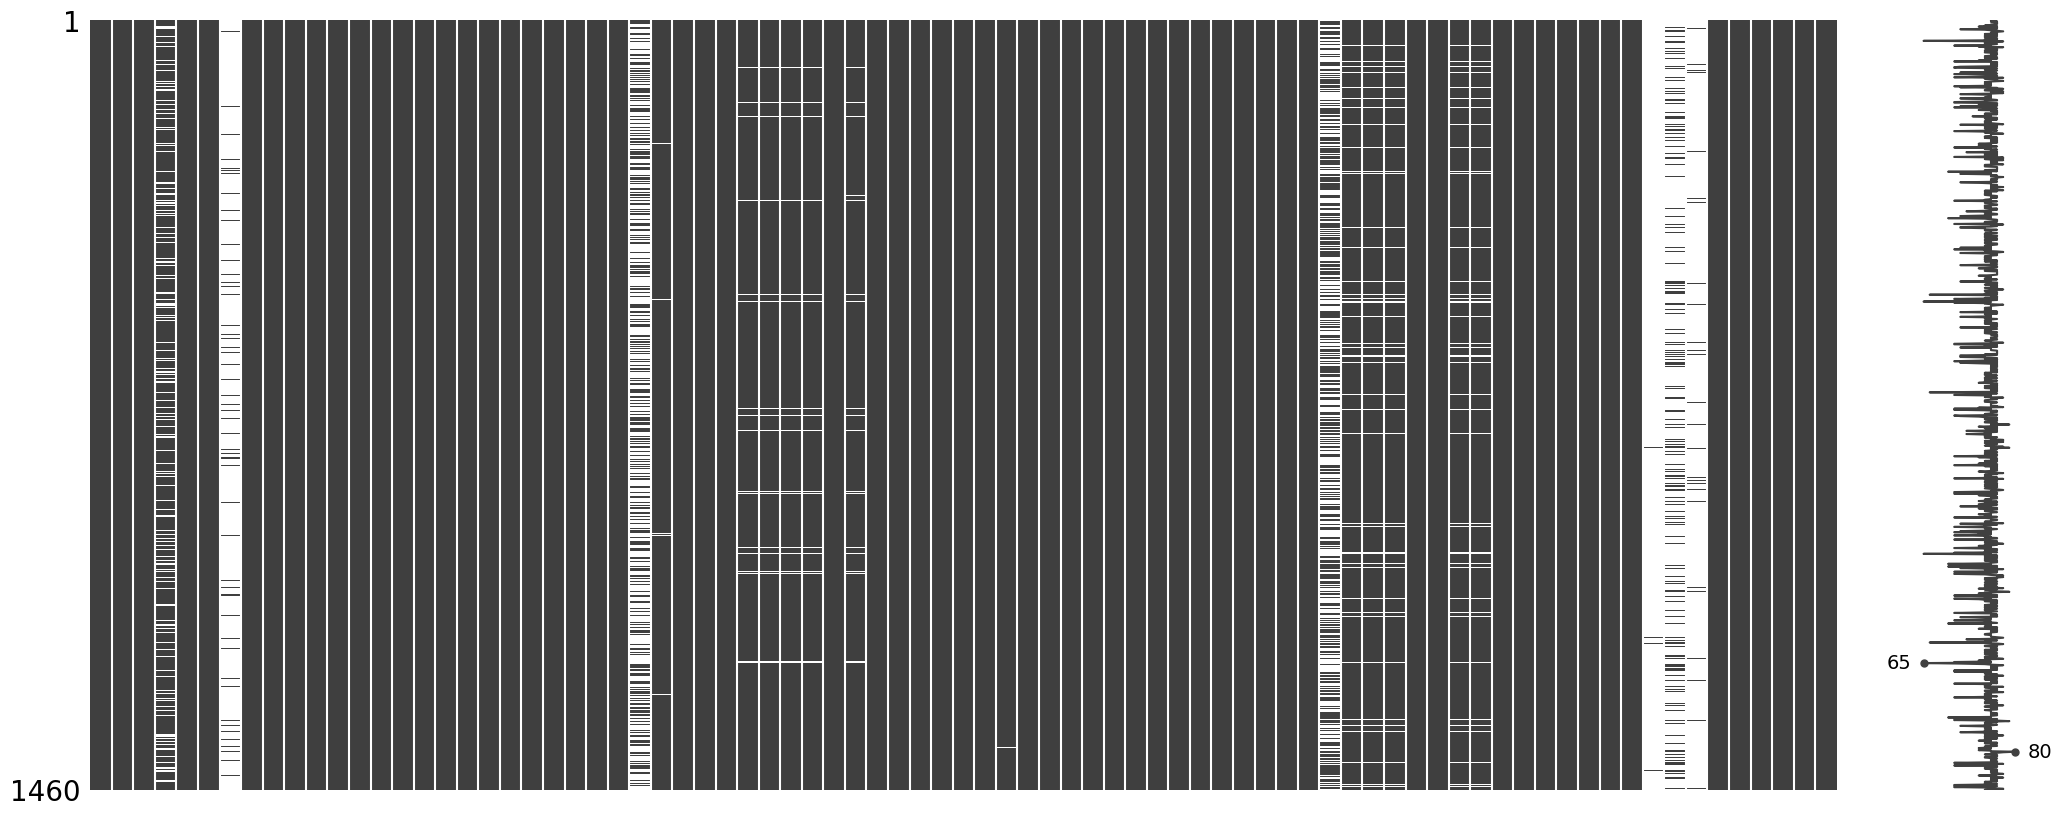

In [13]:
#Check for missing values for each feature.

msn.matrix(data)

In [14]:
# Check the percentage of missing values.

missingRatio = data.isna().sum() * (1/ len(data))

missing = data.isna().sum()

missing_val = pd.concat((missing, missingRatio), axis=1)

missing_val.columns = ["Missing", "Missing_Ratio"]

missing_val.tail(50)

,Missing,Missing_Ratio
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtFinSF1,0,0.000000
BsmtFinType2,38,0.026027
BsmtFinSF2,0,0.000000
BsmtUnfSF,0,0.000000
TotalBsmtSF,0,0.000000
Heating,0,0.000000
HeatingQC,0,0.000000


<Axes: >

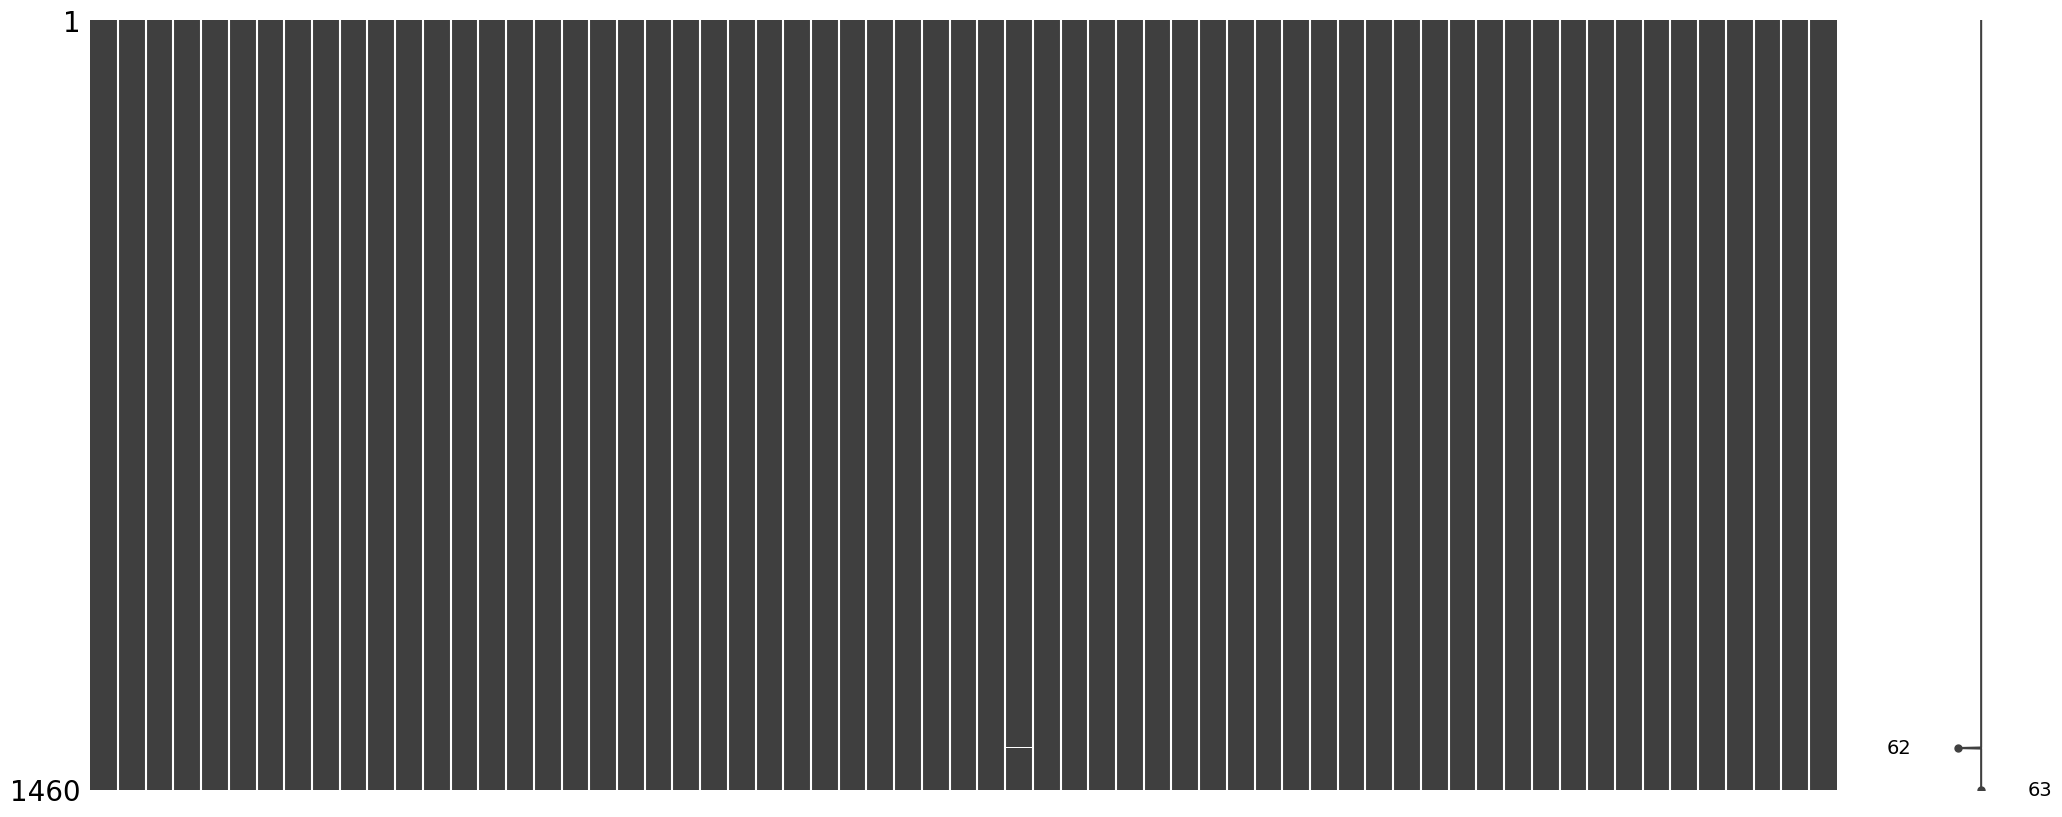

In [15]:
# Delete features (columns) that have 5 or more missing values

dropColumns = missing_val[missing_val["Missing"] >= 5].index


data.drop(dropColumns, axis=1, inplace=True)

msn.matrix(data)

In [16]:
#Samples (rows) with missing values are deleted from the data from which features with 5 or more missing values have been deleted.

data.sample(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
867,868,20,RL,6970,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,400,5,2007,WD,Normal,129000
517,518,60,RL,10208,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,265000
1104,1105,160,RM,2016,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2007,WD,Normal,106000
71,72,20,RL,7599,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,129500
786,787,50,RM,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,196,0,0,0,1200,6,2010,WD,Normal,139000
896,897,30,RM,8765,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,106500
476,477,20,RL,13125,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2008,WD,Normal,208900
1097,1098,120,RL,3696,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,137,0,0,0,0,10,2007,WD,Normal,170000
864,865,20,FV,8640,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,New,Partial,250580
1159,1160,60,RL,9120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,185000


Problem 5:Terminology research

kurtosis: Kurtosis describes the thickness of the tails and the shape of the peak of a distribution.

Skewness: Skewness describes the symmetry of a distribution.

Both skewness and kurtosis are important in understanding the characteristics of a dataset, and they are often used in statistical analysis to assess the departure of a dataset from a normal distribution.

Problem 6 : Check the distribution

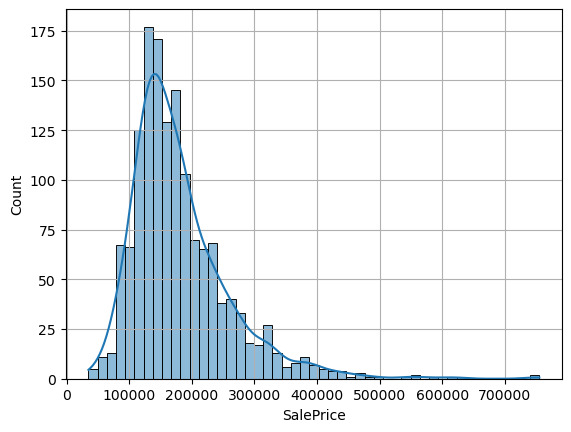

C:\Users\cbt04\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


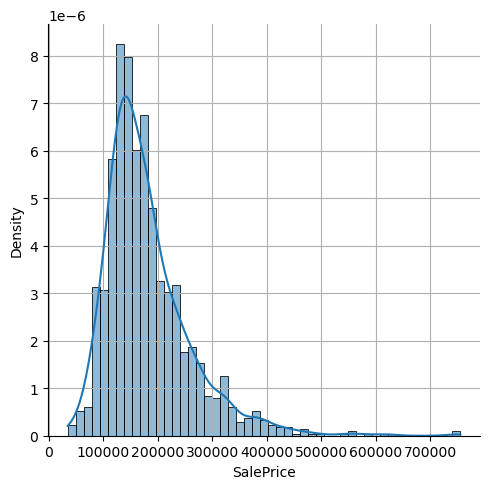

Kurtosis: 6.51 
Skewness: 1.88


In [19]:
target = data.SalePrice
sns.histplot(target, kde=True)

plt.grid(True)
plt.show()

sns.displot(target, kde=True, stat="density")
plt.grid(True)
plt.show()

# calculate "kurtosis" and "skewness"

kurtosis = stats.kurtosis(target, bias=True)

skewness = stats.skew(target, bias=True)

print(f"Kurtosis: {round(kurtosis, 2)} \n", f"\rSkewness: {round(skewness, 2)}")

The target data is leptokurtic becuase its kurtosis is greater than 3. This means that the data produces more extreme values than the normal distribution.

The target value is positively skewed because skewness > 1, the tail of the distribution is on the right. Becuase the data has a skewness of 1.88 it indicates that the data is highly skewed.

C:\Users\cbt04\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


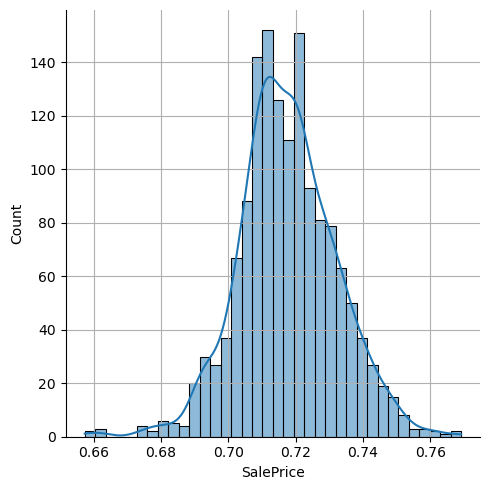

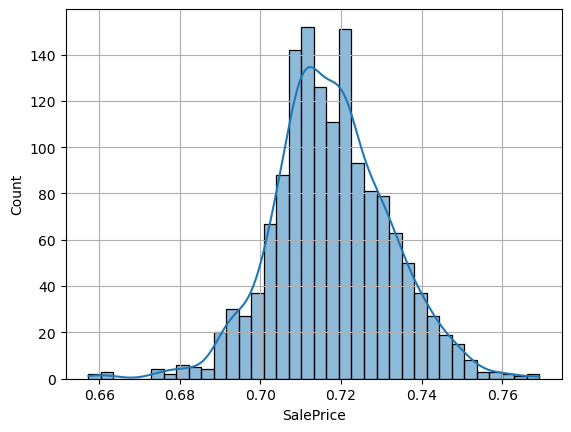

Kurtosis: 0.89 
Skewness: -0.02


In [21]:
#Perform a logarithmic transformation on the objective variable

target = target.apply(np.log10)

sns.displot(target, kde=True)
plt.grid(True)
plt.show()

sns.histplot(target, kde=True)
plt.grid(True)
plt.show()

#calculate "kurtosis" and "skewness"
kurtosis = stats.kurtosis(target)

skewness = stats.skew(target)

print(f"Kurtosis: {round(kurtosis, 2)} \n", f"\rSkewness: {round(skewness, 2)}")

By transforming the distribution to its logarithmic version, we have normalized the data. Making it closer to a normal distribution.

The target data is playkurtic, this is becuase it's kurtosis is less than 3. This means that the distribution has fewer outliners than the normal distribution.

The target value is slighlty negatively skewed(left skewed) because skewness < 0,. A skewness value of-0.02 implies that The left tail is longer or fatter than the right tail. The distribution is concentrated toward the right side, and there are some lower values that are farther from the mean than the higher values.

Problem 7: Checking the correlation coefficient

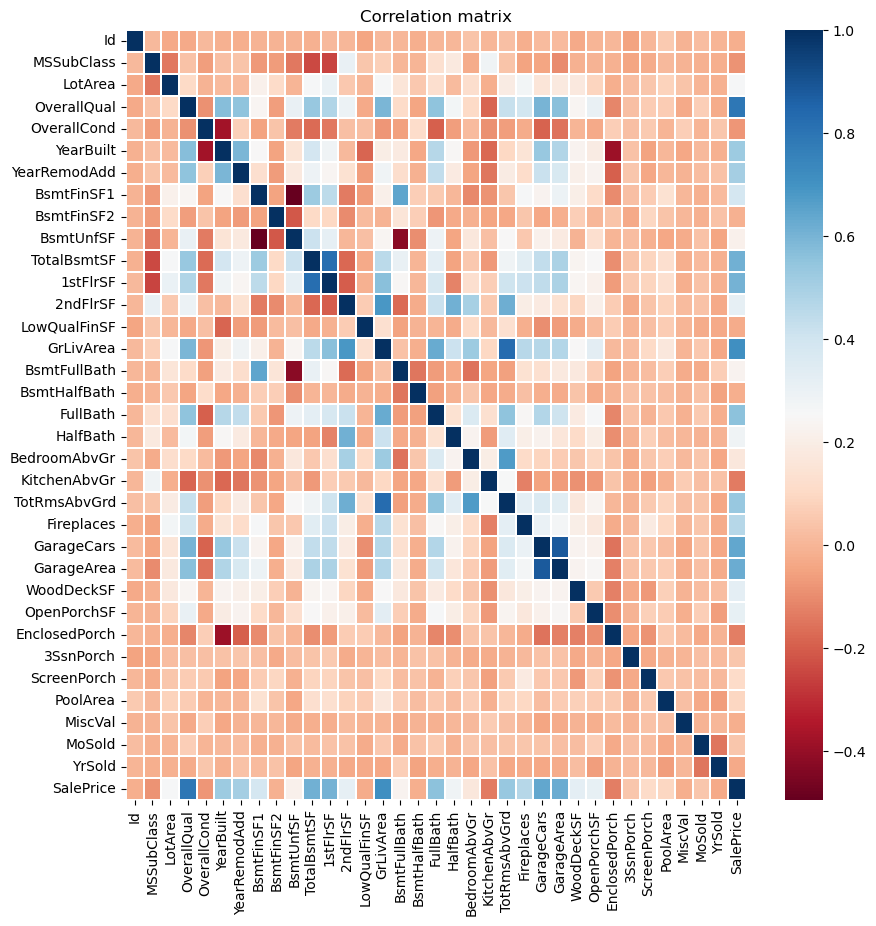

In [45]:
df_corr = data.corr(numeric_only =True)

color = plt.cm.RdBu

plt.subplots(figsize=(10, 10))
plt.title("Correlation matrix")
sns.heatmap(df_corr, cmap=color, linewidths=0.1, vmax=1)
plt.show()

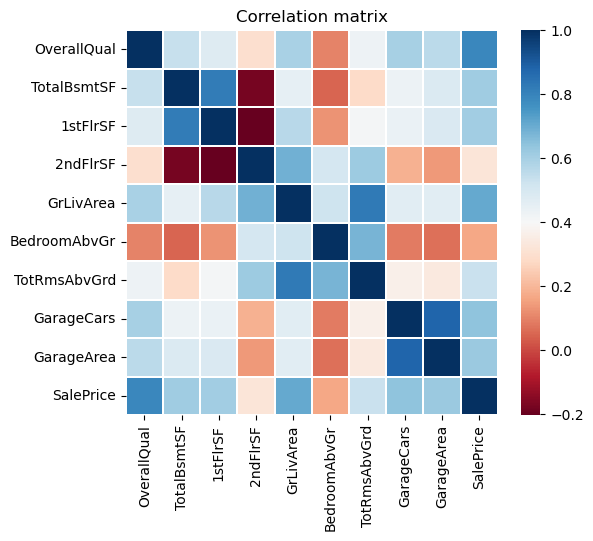

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


In [46]:
#Select 10 features that have a high correlation with the target variable, and create a correlation coefficient matrix heat map for these

#selecting features with correlation above lower threshold

top_thres = df_corr < 1

low_thres = df_corr > 0.65
# low_thres < target < 1
x = (df_corr[top_thres & low_thres]).isna().all()

c = [not i for i in x]

target_features = x[c].index


targetFeatures_corr = data[target_features].corr()

plt.subplots(figsize= (6, 5))
plt.title("Correlation matrix")
sns.heatmap(targetFeatures_corr, cmap=color,linewidths=0.1, vmax=1)
plt.show()
print(target_features)



Summary of what the 10 selected features represent in Japanese using the Kaggle DataDescription as a reference.from Kaggle's DataDescription,
The characteristics that affect the price of a home include: 'OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'.

TotalBsmtSF (Total square feet of basement area): This makes sense becuase housess with larger basements tend to cost more than houses with smaller basements

1stFlrSF (First Floor square feet): Generally the larger a house, the more expensive it is.

2ndFlrSF (Second floor square feet)

Total rooms above grade (TotRmsAbvGrd)

summarily, the larger the features above, the higher the prices of houses tend to be.



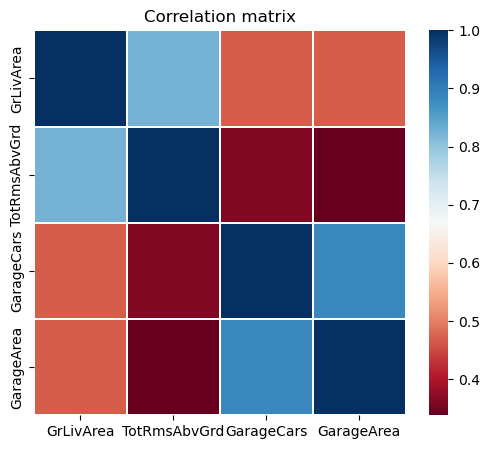

In [47]:
#Find 3 combinations of the 10 selected features that have high correlation coefficients with each other

#selecting features with correlation above lower threshold

top_thresh = targetFeatures_corr < 1

low_thresh = targetFeatures_corr > 0.82
# low_thresh < target < 1
x = (targetFeatures_corr[top_thresh & low_thresh]).isna().all()

c = [not i for i in x]

target_features = x[c].index



targetFeatures_corr =data[target_features].corr()

plt.subplots(figsize= (6, 5))
plt.title("Correlation matrix")
sns.heatmap(targetFeatures_corr, cmap=color,linewidths=0.1, vmax=1)
plt.show()